In [45]:
import pandas as pd
import matplotlib.pyplot as plt

In [46]:
saldo_perusahaan = 242_850_000
saldo_bank = 243_640_500

In [47]:
penyesuaian_perusahaan = {
    "Bilyet giro": 6_500_000,
    "Inkaso": 17_425_000,  # 17.5 jt - 75rb
    "Jasa giro": 465_500,
    "Cek ditolak bank": -10_500_000,
    "Biaya administrasi": -100_000,
    "Koreksi pencatatan": 2_000_000  # 15.5 jt - 13.5 jt
}

In [48]:
penyesuaian_bank = {
    "Deposit in transit": 15_250_000,
    "Kas belum disetorkan ke bank": 11_750_000,
    "Outstanding checks": -9_300_000,
    "Koreksi pencatatan": -2_700_000
}

In [49]:
saldo_benar_perusahaan = saldo_perusahaan + sum (penyesuaian_perusahaan.values())
saldo_benar_bank = saldo_bank + sum (penyesuaian_bank.values())

print ("Saldo kas menurut perusahaan:", saldo_perusahaan)
print ("Saldo kas menurut bank:", saldo_bank)
print ("\nRekonsiliasi:")
print ("Saldo kas yang benar (dari perusahaan): Rp {:,.0f}".format (saldo_benar_perusahaan))
print ("Saldo kas yang benar (dari bank): Rp {:,.0f}".format (saldo_benar_bank))

assert saldo_benar_perusahaan == saldo_benar_bank, "Saldo tidak cocok!"


Saldo kas menurut perusahaan: 242850000
Saldo kas menurut bank: 243640500

Rekonsiliasi:
Saldo kas yang benar (dari perusahaan): Rp 258,640,500
Saldo kas yang benar (dari bank): Rp 258,640,500


In [50]:
print ("\nPenyesuaian menurut perusahaan:")
pd.Series (penyesuaian_perusahaan).to_frame ("jumlah (Rp)")

print ("\nPenyesuaian menurut bank:")
pd.Series (penyesuaian_bank).to_frame ("jumlah (Rp)")


Penyesuaian menurut perusahaan:

Penyesuaian menurut bank:


,jumlah (Rp)
Deposit in transit,15250000
Kas belum disetorkan ke bank,11750000
Outstanding checks,-9300000
Koreksi pencatatan,-2700000


In [51]:
jurnal_data = [
    {"Keterangan": "Piutang Dagang (cek ditolak)", "Debit": 10_500_000, "Kredit": 0, "Akun Kredit": "Kas"},
    {"Keterangan": "Kas (bilyet giro)", "Debit": 6_500_000, "Kredit": 0, "Akun Kredit": "Piutang Dagang"},
    {"Keterangan": "Kas (hasil inkaso)", "Debit": 17_425_000, "Kredit": 0, "Akun Kredit": "Piutang Dagang"},
    {"Keterangan": "Biaya Administrasi Bank", "Debit": 100_000, "Kredit": 0, "Akun Kredit": "Kas"},
    {"Keterangan": "Kas (jasa giro)", "Debit": 465_500, "Kredit": 0, "Akun Kredit": "Pendapatan Giro"},
    {"Keterangan": "Kas (koreksi cek PT INTAN)", "Debit": 2_000_000, "Kredit": 0, "Akun Kredit": "Utang Dagang"},
]

In [52]:
jurnal_df = pd.DataFrame (jurnal_data)
jurnal_df ["Kredit"] = jurnal_df.apply (lambda row: row ["Debit"] if row ["Kredit"] == 0 else row ["Kredit"], axis=1)
jurnal_df ["Akun Debit"] = jurnal_df ["Keterangan"].apply (lambda x: x.split(" (")[0])

print ("\n Jurnal Penyesuaian:")
jurnal_df [["Akun Debit", "Debit", "Akun Kredit", "Kredit"]]


 Jurnal Penyesuaian:


,Akun Debit,Debit,Akun Kredit,Kredit
0,Piutang Dagang,10500000,Kas,10500000
1,Kas,6500000,Piutang Dagang,6500000
2,Kas,17425000,Piutang Dagang,17425000
3,Biaya Administrasi Bank,100000,Kas,100000
4,Kas,465500,Pendapatan Giro,465500
5,Kas,2000000,Utang Dagang,2000000


In [53]:
teks = f"""Rekonsiliasi Bank - PD FORTUNA

Saldo kas menurut perusahaan: Rp {saldo_perusahaan:,.0f}
Saldo kas menurut bank      : Rp {saldo_bank:,.0f}

Penyesuaian:
Saldo kas yang benar (dari perusahaan): Rp {saldo_benar_perusahaan:,.0f}
Saldo kas yang benar (dari bank)      : Rp {saldo_benar_bank:,.0f}
"""

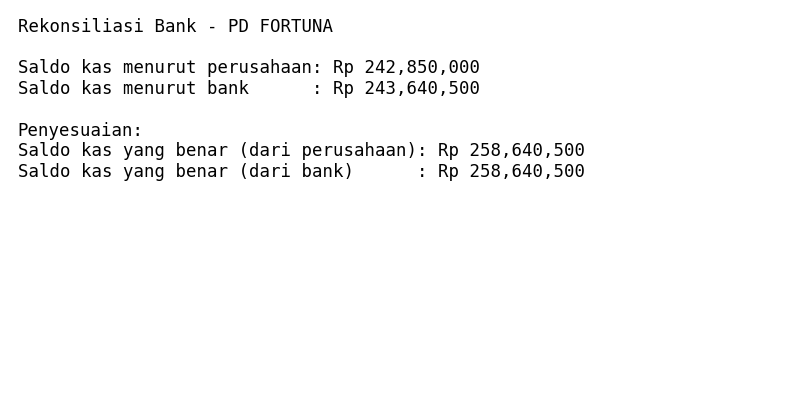

In [54]:
plt.figure (figsize=(10, 5))
plt.text (0.01, 0.98, teks, fontsize=12.5, va='top', family='monospace')
plt.axis ('off')
plt.savefig ("rekonsiliasibank.png", bbox_inches='tight', dpi=300)
plt.show ()